1. Problem: Implement the K-nearest neighbors (KNN) algorithm from scratch. Given a
dataset and a query point, classify the query based on the majority label of its k-nearest
neighbors.

In [1]:
import numpy as np
from collections import Counter

# Step 1: Function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

# Step 2: Find the k-nearest neighbors
def get_k_nearest_neighbors(training_data, query_point, k):
    distances = []
    
    # Calculate the distance between query point and each point in the dataset
    for data_point in training_data:
        distance = euclidean_distance(query_point, data_point[:-1])  # Exclude the label
        distances.append((data_point, distance))
    
    # Sort by distance and return the k-nearest neighbors
    distances.sort(key=lambda x: x[1])
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

# Step 3: Perform majority voting to classify the query point
def majority_vote(neighbors):
    labels = [neighbor[-1] for neighbor in neighbors]  # Get the labels of neighbors
    most_common = Counter(labels).most_common(1)  # Find the label that appears the most
    return most_common[0][0]

# KNN Classifier
def knn_classifier(training_data, query_point, k):
    neighbors = get_k_nearest_neighbors(training_data, query_point, k)
    return majority_vote(neighbors)

# Sample dataset: [features..., label]
training_data = [
    [2.0, 3.0, 'A'],
    [1.0, 1.0, 'B'],
    [4.0, 2.0, 'A'],
    [6.0, 5.0, 'B'],
    [3.0, 3.0, 'A'],
    [7.0, 8.0, 'B']
]

# Example query point
query_point = [5.0, 3.0]

# Set the number of neighbors (k)
k = 3

# Perform classification
result = knn_classifier(training_data, query_point, k)
print(f"The predicted label for the query point {query_point} is: {result}")


The predicted label for the query point [5.0, 3.0] is: A


2. Problem: Implement logistic regression in Python. Include training using gradient descent,
and calculate class probabilities for binary classification.

In [2]:
import numpy as np

# Step 1: Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 2: Define the cost function (binary cross-entropy) and gradient
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))  # Predicted values
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

# Step 3: Perform gradient descent to update weights
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    m = len(y)
    
    for i in range(num_iterations):
        # Step 4: Update weights using gradient descent
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient

        # Optionally print cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, weights)
            print(f"Iteration {i}, Cost: {cost}")
    
    return weights

# Step 5: Predict probabilities and class (binary classification)
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if p >= 0.5 else 0 for p in probabilities]

# Step 6: Logistic Regression function
def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize weights (one for each feature + bias)
    weights = np.zeros(X.shape[1])
    
    # Train the model using gradient descent
    weights = gradient_descent(X, y, weights, learning_rate, num_iterations)
    
    return weights

# Example usage:
if __name__ == "__main__":
    # Sample dataset: [Feature1, Feature2, Bias (x0 = 1)]
    X = np.array([
        [1, 2, 1],  # Bias term (x0 = 1)
        [2, 3, 1],
        [3, 4, 1],
        [4, 5, 1],
        [5, 6, 1]
    ])
    
    # Labels (y)
    y = np.array([0, 0, 0, 1, 1])

    # Parameters
    learning_rate = 0.01
    num_iterations = 1000

    # Train logistic regression model
    trained_weights = logistic_regression(X, y, learning_rate, num_iterations)
    
    # Make predictions
    predictions = predict(X, trained_weights)
    
    print(f"Trained Weights: {trained_weights}")
    print(f"Predictions: {predictions}")


Iteration 0, Cost: 0.6917854297965054
Iteration 100, Cost: 0.6501295135671598
Iteration 200, Cost: 0.6177745587666571
Iteration 300, Cost: 0.5884690496913079
Iteration 400, Cost: 0.5618923947992228
Iteration 500, Cost: 0.5377500037912307
Iteration 600, Cost: 0.5157748664608409
Iteration 700, Cost: 0.49572746396065936
Iteration 800, Cost: 0.4773945770374852
Iteration 900, Cost: 0.4605874373337157
Trained Weights: [ 0.86987631 -0.35051264 -1.22038895]
Predictions: [0, 0, 0, 1, 1]


3. Problem: Write a function to perform matrix multiplication without using external libraries
like NumPy. Multiply two matrices representing weight matrices and input vectors in a neural
network layer

In [3]:
# Step 1: Define matrix multiplication function
def matrix_multiply(A, B):
    # Get the dimensions of the matrices
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    
    # Ensure the number of columns in A equals the number of rows in B
    if cols_A != rows_B:
        raise ValueError("Number of columns in A must equal number of rows in B")
    
    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    
    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

# Example usage:
if __name__ == "__main__":
    # Sample matrices
    A = [
        [1, 2, 3],
        [4, 5, 6]
    ]
    
    B = [
        [7, 8],
        [9, 10],
        [11, 12]
    ]
    
    # Perform matrix multiplication
    result = matrix_multiply(A, B)
    
    # Print the result
    print("Result of A * B:")
    for row in result:
        print(row)


Result of A * B:
[58, 64]
[139, 154]


4. Problem: Write a Python function that deep copies a neural network represented as a
nested list of layers, where each layer contains weight matrices.

In [4]:
import copy

# Step 1: Define the function to deep copy a neural network
def deep_copy_neural_network(network):
    # Use Python's built-in deepcopy function to create a deep copy of the network
    return copy.deepcopy(network)

# Example usage:
if __name__ == "__main__":
    # Sample neural network represented as a nested list of layers (each layer has a weight matrix)
    neural_network = [
        # Layer 1 weights (2x3 matrix)
        [
            [0.2, 0.5, 0.1],
            [0.4, 0.7, 0.3]
        ],
        # Layer 2 weights (3x2 matrix)
        [
            [0.6, 0.8],
            [0.9, 0.2],
            [0.3, 0.4]
        ]
    ]
    
    # Perform a deep copy of the neural network
    copied_network = deep_copy_neural_network(neural_network)
    
    # Modify the original neural network to verify that the copy is independent
    neural_network[0][0][0] = 1.0  # Modify an element in the original network
    
    # Print original and copied networks
    print("Original Neural Network:")
    print(neural_network)
    
    print("\nCopied Neural Network:")
    print(copied_network)


Original Neural Network:
[[[1.0, 0.5, 0.1], [0.4, 0.7, 0.3]], [[0.6, 0.8], [0.9, 0.2], [0.3, 0.4]]]

Copied Neural Network:
[[[0.2, 0.5, 0.1], [0.4, 0.7, 0.3]], [[0.6, 0.8], [0.9, 0.2], [0.3, 0.4]]]


5. Problem: Implement a moving average filter for a time series. Given a series of numbers
and a window size, return the moving average of the series.

In [5]:
# Step 1: Define the moving average function
def moving_average(time_series, window_size):
    result = []
    
    # Step 2: Calculate moving averages
    for i in range(len(time_series) - window_size + 1):
        window = time_series[i:i + window_size]  # Get the current window
        window_avg = sum(window) / window_size  # Calculate the average of the window
        result.append(window_avg)
    
    return result

# Example usage:
if __name__ == "__main__":
    # Sample time series
    time_series = [10, 20, 30, 40, 50, 60, 70]
    
    # Window size
    window_size = 3
    
    # Compute moving average
    result = moving_average(time_series, window_size)
    
    # Print the result
    print("Moving Average:", result)


Moving Average: [20.0, 30.0, 40.0, 50.0, 60.0]


6. Problem: Write a Python function that applies the ReLU activation function to a list of
inputs

In [6]:
# Step 1: Define the ReLU function
def relu(inputs):
    # Apply ReLU to each element in the input list
    return [max(0, x) for x in inputs]

# Example usage:
if __name__ == "__main__":
    # Sample input list
    inputs = [-5, 3, -2, 7, -1, 0]
    
    # Apply ReLU function
    result = relu(inputs)
    
    # Print the result
    print("ReLU Output:", result)


ReLU Output: [0, 3, 0, 7, 0, 0]


7. Problem: Implement gradient descent to train a linear regression model. Minimize the
mean squared error by adjusting the model weights iteratively

In [7]:
# Step 1: Define the linear regression model and gradient descent function
def gradient_descent(X, y, learning_rate, epochs):
    # Initialize weights (w) and bias (b) to 0
    w, b = 0.0, 0.0
    
    n = len(X)  # Number of data points
    
    # Step 2: Perform gradient descent for the specified number of epochs
    for _ in range(epochs):
        # Predicted value for each data point
        y_pred = w * X + b
        
        # Compute the gradients
        dw = -(2/n) * sum(X * (y - y_pred))  # Gradient w.r.t. weight
        db = -(2/n) * sum(y - y_pred)        # Gradient w.r.t. bias
        
        # Update the weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b

# Step 3: Define mean squared error function
def mean_squared_error(X, y, w, b):
    y_pred = w * X + b
    return sum((y - y_pred) ** 2) / len(X)

# Example usage:
if __name__ == "__main__":
    # Sample data (X: inputs, y: labels)
    X = [1, 2, 3, 4, 5]
    y = [5, 7, 9, 11, 13]
    
    # Learning rate and number of iterations
    learning_rate = 0.01
    epochs = 1000
    
    # Convert lists to arrays for mathematical operations
    X = np.array(X)
    y = np.array(y)
    
    # Train the model using gradient descent
    w, b = gradient_descent(X, y, learning_rate, epochs)
    
    # Output the learned weights and bias
    print(f"Trained model: y = {w:.2f} * x + {b:.2f}")
    
    # Calculate and print the mean squared error
    mse = mean_squared_error(X, y, w, b)
    print(f"Mean Squared Error: {mse:.2f}")


Trained model: y = 2.02 * x + 2.92
Mean Squared Error: 0.00


8. Problem: Write a Python function to perform one-hot encoding of categorical labels for a
machine learning task

In [8]:
# Step 1: Define the one-hot encoding function
def one_hot_encode(labels):
    unique_labels = list(set(labels))  # Get unique labels
    one_hot = []
    
    # Step 2: Create one-hot encoded vectors
    for label in labels:
        encoding = [1 if label == unique else 0 for unique in unique_labels]
        one_hot.append(encoding)
    
    return one_hot

# Example usage:
if __name__ == "__main__":
    # Sample categorical labels
    labels = ['cat', 'dog', 'cat', 'bird']
    
    # Perform one-hot encoding
    encoded_labels = one_hot_encode(labels)
    
    # Print the result
    print("One-Hot Encoded Labels:")
    for label, encoding in zip(labels, encoded_labels):
        print(f"{label}: {encoding}")


One-Hot Encoded Labels:
cat: [0, 1, 0]
dog: [1, 0, 0]
cat: [0, 1, 0]
bird: [0, 0, 1]


9. Problem: Implement a Python function to calculate the cosine similarity between two
vectors, which is often used in text similarity tasks.

In [9]:
# Step 1: Define the cosine similarity function
def cosine_similarity(vec1, vec2):
    # Step 2: Calculate the dot product
    dot_product = sum(v1 * v2 for v1, v2 in zip(vec1, vec2))
    
    # Step 3: Calculate the magnitudes (lengths) of the vectors
    magnitude_vec1 = sum(v1 ** 2 for v1 in vec1) ** 0.5
    magnitude_vec2 = sum(v2 ** 2 for v2 in vec2) ** 0.5
    
    # Step 4: Calculate cosine similarity (avoid division by zero)
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0
    return dot_product / (magnitude_vec1 * magnitude_vec2)

# Example usage:
if __name__ == "__main__":
    # Sample vectors
    vec1 = [1, 2, 3]
    vec2 = [4, 5, 6]
    
    # Calculate cosine similarity
    result = cosine_similarity(vec1, vec2)
    
    # Print the result
    print(f"Cosine Similarity: {result:.4f}")


Cosine Similarity: 0.9746


10. Problem: Given a trained neural network in Python, write a function to prune the network
by removing neurons that have small or zero weights.

In [10]:
# Step 1: Define the pruning function
def prune_network(network, threshold):
    """
    Prune neurons in the neural network with weights below the specified threshold.
    
    :param network: A nested list representing the neural network's layers and weights.
    :param threshold: A float representing the weight threshold for pruning.
    :return: A pruned version of the neural network.
    """
    pruned_network = []

    # Step 2: Iterate through each layer in the network
    for layer in network:
        pruned_layer = []
        for neuron_weights in layer:
            # Step 3: Check if the weights are above the threshold
            if any(abs(weight) > threshold for weight in neuron_weights):
                pruned_layer.append(neuron_weights)  # Keep the neuron
        pruned_network.append(pruned_layer)  # Add the pruned layer

    return pruned_network

# Example usage:
if __name__ == "__main__":
    # Sample neural network: each inner list represents weights of a neuron
    network = [
        [[0.1, 0.2, 0], [0, 0, 0]],   # Layer 1
        [[0, 0, 0], [0.5, 0.3, 0]],   # Layer 2
        [[0.2, 0.4], [0, 0.1]]         # Layer 3
    ]

    # Prune the network with a threshold of 0.1
    threshold = 0.1
    pruned_network = prune_network(network, threshold)

    # Print the pruned network
    print("Pruned Neural Network:")
    for layer in pruned_network:
        print(layer)


Pruned Neural Network:
[[0.1, 0.2, 0]]
[[0.5, 0.3, 0]]
[[0.2, 0.4]]


11. Problem: Implement a Python function to compute the confusion matrix given true and
predicted labels for a classification task.

In [11]:
# Step 1: Define the function to compute the confusion matrix
def confusion_matrix(true_labels, predicted_labels):
    # Step 2: Get unique classes from true labels
    classes = list(set(true_labels))
    matrix = {cls: {c: 0 for c in classes} for cls in classes}  # Initialize matrix

    # Step 3: Populate the confusion matrix
    for true, pred in zip(true_labels, predicted_labels):
        matrix[true][pred] += 1

    return matrix

# Example usage:
if __name__ == "__main__":
    # Sample true and predicted labels
    true_labels = ['cat', 'dog', 'dog', 'cat', 'cat', 'dog']
    predicted_labels = ['cat', 'dog', 'cat', 'cat', 'dog', 'dog']

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Print the confusion matrix
    print("Confusion Matrix:")
    for cls, row in cm.items():
        print(f"{cls}: {row}")


Confusion Matrix:
dog: {'dog': 2, 'cat': 1}
cat: {'dog': 1, 'cat': 2}


12. Problem: Write a Python function that performs mini-batch gradient descent for optimizing
the weights of a neural network.

In [13]:
import numpy as np
import random

# Step 1: Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 2: Define the mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, weights, learning_rate=0.01, batch_size=5, epochs=100):
    """
    Perform mini-batch gradient descent to optimize the weights of a neural network.
    
    :param X: Input data (features).
    :param y: True labels (target values).
    :param weights: Initial weights of the neural network.
    :param learning_rate: The learning rate for weight updates.
    :param batch_size: Number of samples per mini-batch.
    :param epochs: Number of iterations over the entire dataset.
    """
    n_samples = len(X)
    
    for epoch in range(epochs):
        # Step 3: Shuffle the data for each epoch
        combined = list(zip(X, y))
        random.shuffle(combined)
        X_shuffled, y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        y_shuffled = np.array(y_shuffled)

        # Step 4: Create mini-batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            # Step 5: Forward pass
            layer_input = X_batch
            activations = []
            for weight in weights:
                layer_input = sigmoid(np.dot(layer_input, weight))
                activations.append(layer_input)

            # Step 6: Compute the loss
            loss = activations[-1] - y_batch

            # Step 7: Backward pass
            gradients = []
            for layer in reversed(range(len(weights))):
                if layer == len(weights) - 1:  # Output layer
                    gradient = loss * sigmoid_derivative(activations[layer])
                else:  # Hidden layers
                    gradient = np.dot(loss, weights[layer + 1].T) * sigmoid_derivative(activations[layer])
                
                gradients.append(np.dot(activations[layer - 1].T, gradient) if layer > 0 else np.dot(X_batch.T, gradient))
                loss = gradient
            
            # Step 8: Update weights
            for j in range(len(weights)):
                weights[j] -= learning_rate * gradients[-(j + 1)]

    return weights

# Example usage:
if __name__ == "__main__":
    # Sample input data (features) and true labels
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])  # XOR problem

    # Initialize weights for a simple neural network (2 input neurons, 2 hidden neurons, 1 output neuron)
    weights = [
        np.random.rand(2, 2),  # Weights between input and hidden layer
        np.random.rand(2, 1)   # Weights between hidden and output layer
    ]

    # Train the neural network using mini-batch gradient descent
    optimized_weights = mini_batch_gradient_descent(X, y, weights, learning_rate=0.1, batch_size=2, epochs=10000)

    # Print the optimized weights
    for i, weight in enumerate(optimized_weights):
        print(f"Layer {i + 1} weights:\n{weight}")


Layer 1 weights:
[[0.25462057 2.95598253]
 [1.05513304 3.27163676]]
Layer 2 weights:
[[-3.11386671]
 [ 2.48876804]]


13. Problem: Implement k-means clustering from scratch. Given a dataset and the number of
clusters k , return the cluster assignments for each data point.

In [14]:
import numpy as np

def initialize_centroids(X, k):
    """Randomly select k data points as initial centroids."""
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids by calculating the mean of the assigned data points."""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    """Perform K-means clustering.
    
    :param X: Input data points (shape: n_samples x n_features).
    :param k: Number of clusters.
    :param max_iters: Maximum number of iterations.
    :param tol: Tolerance to check for convergence.
    :return: Cluster assignments for each data point.
    """
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        # Step 1: Assign clusters
        labels = assign_clusters(X, centroids)
        
        # Step 2: Update centroids
        new_centroids = update_centroids(X, labels, k)
        
        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        
        centroids = new_centroids
    
    return labels

# Example usage
if __name__ == "__main__":
    # Sample data: 2D points
    X = np.array([[1, 2], [1, 4], [1, 0],
                  [10, 2], [10, 4], [10, 0]])

    k = 2  # Number of clusters
    labels = k_means(X, k)

    # Print the cluster assignments
    print("Cluster assignments for each data point:", labels)


Cluster assignments for each data point: [0 1 0 0 1 0]


14. Problem: Implement a Python function to calculate the softmax of a list of numbers, which
is used in multi-class classification problems.

In [15]:
import numpy as np

def softmax(logits):
    """
    Compute the softmax of a list of numbers.
    
    :param logits: A list or NumPy array of raw scores (logits).
    :return: A NumPy array of probabilities corresponding to each input score.
    """
    # Subtract the max for numerical stability
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()

# Example usage
if __name__ == "__main__":
    # Sample logits (raw scores)
    logits = [2.0, 1.0, 0.1]
    
    probabilities = softmax(logits)
    print("Probabilities:", probabilities)
    print("Sum of probabilities:", np.sum(probabilities))


Probabilities: [0.65900114 0.24243297 0.09856589]
Sum of probabilities: 1.0


15. Problem: Write a Python function to compute the TF-IDF (Term Frequency-Inverse
Document Frequency) for a list of documents.

In [16]:
import numpy as np
from collections import Counter
import math

def compute_tf(doc):
    """Compute the term frequency (TF) for a single document."""
    tf_count = Counter(doc)
    tf = {word: count / len(doc) for word, count in tf_count.items()}
    return tf

def compute_idf(documents):
    """Compute the inverse document frequency (IDF) for the list of documents."""
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc)

    for word in all_words:
        count = sum(1 for doc in documents if word in doc)
        idf[word] = math.log(N / (1 + count))  # Adding 1 to avoid division by zero

    return idf

def compute_tfidf(documents):
    """Compute the TF-IDF for a list of documents."""
    tfidf = []
    idf = compute_idf(documents)

    for doc in documents:
        tf = compute_tf(doc)
        tfidf_doc = {word: tf[word] * idf[word] for word in doc}
        tfidf.append(tfidf_doc)

    return tfidf

# Example usage
if __name__ == "__main__":
    documents = [
        ["the", "cat", "in", "the", "hat"],
        ["the", "dog", "in", "the", "fog"],
        ["the", "cat", "and", "the", "dog"]
    ]
    
    tfidf_scores = compute_tfidf(documents)
    for i, doc in enumerate(tfidf_scores):
        print(f"Document {i+1} TF-IDF scores: {doc}")


Document 1 TF-IDF scores: {'the': -0.11507282898071236, 'cat': 0.0, 'in': 0.0, 'hat': 0.08109302162163289}
Document 2 TF-IDF scores: {'the': -0.11507282898071236, 'dog': 0.0, 'in': 0.0, 'fog': 0.08109302162163289}
Document 3 TF-IDF scores: {'the': -0.11507282898071236, 'cat': 0.0, 'and': 0.08109302162163289, 'dog': 0.0}


16. Problem: Implement an algorithm to find the principal components of a dataset using
singular value decomposition (SVD), which is a core part of PCA (Principal Component
Analysis)

In [17]:
import numpy as np

def pca_svd(X, num_components):
    """
    Perform PCA using Singular Value Decomposition (SVD).
    
    :param X: Input data matrix (shape: n_samples x n_features).
    :param num_components: Number of principal components to return.
    :return: Projected data onto the principal components.
    """
    # Step 1: Center the data (subtract the mean)
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Perform Singular Value Decomposition
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Select the first num_components principal components
    W = Vt[:num_components].T  # Get the first `num_components` rows and transpose
    
    # Step 4: Project the data onto the principal components
    X_pca = X_centered.dot(W)

    return X_pca, W

# Example usage
if __name__ == "__main__":
    # Sample data: 5 samples with 3 features
    X = np.array([[2.5, 2.4],
                  [0.5, 0.7],
                  [2.2, 2.9],
                  [1.9, 2.2],
                  [3.1, 3.0],
                  [2.3, 2.7],
                  [2, 1.6],
                  [1, 1.1],
                  [1.5, 1.6],
                  [1.1, 0.9]])

    num_components = 1  # Number of principal components
    X_pca, components = pca_svd(X, num_components)

    print("Projected data:\n", X_pca)
    print("Principal components:\n", components)


Projected data:
 [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]
Principal components:
 [[-0.6778734 ]
 [-0.73517866]]


17. Problem: Write a Python function to calculate the AUC-ROC score for a binary
classification problem, given the true labels and predicted probabilities.

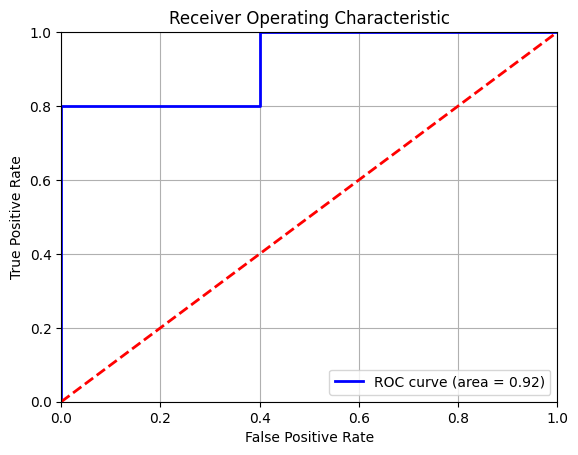

AUC-ROC score: 0.92


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def calculate_auc_roc(true_labels, predicted_probs):
    """
    Calculate the AUC-ROC score and plot the ROC curve.
    
    :param true_labels: Array-like of true binary labels (0 or 1).
    :param predicted_probs: Array-like of predicted probabilities for the positive class.
    :return: AUC score.
    """
    # Step 1: Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    
    # Step 2: Calculate the AUC score
    auc_score = auc(fpr, tpr)
    
    # Step 3: Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    return auc_score

# Example usage
if __name__ == "__main__":
    # Sample true labels and predicted probabilities
    true_labels = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0])
    predicted_probs = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.95, 0.85, 0.5, 0.6, 0.3])
    
    auc_score = calculate_auc_roc(true_labels, predicted_probs)
    print("AUC-ROC score:", auc_score)


18. Problem: Implement a Python function to apply dropout regularization to the neurons of a
given neural network during training

In [19]:
import numpy as np

def dropout(X, dropout_rate):
    """
    Apply dropout to the input data.

    :param X: Input data (shape: n_samples x n_neurons).
    :param dropout_rate: The probability of dropping a neuron (between 0 and 1).
    :return: Data after applying dropout and the dropout mask.
    """
    # Generate a dropout mask
    mask = np.random.rand(*X.shape) > dropout_rate
    # Scale the output by the inverse of (1 - dropout_rate) during training
    scaled_output = X * mask / (1 - dropout_rate)
    return scaled_output, mask

# Example usage
if __name__ == "__main__":
    # Sample input data (5 samples with 4 neurons)
    X = np.array([[0.2, 0.8, 0.5, 0.1],
                  [0.4, 0.3, 0.6, 0.7],
                  [0.5, 0.2, 0.1, 0.9],
                  [0.6, 0.4, 0.3, 0.2],
                  [0.9, 0.5, 0.2, 0.8]])

    dropout_rate = 0.3  # 30% dropout
    X_dropped, mask = dropout(X, dropout_rate)

    print("Original Input:\n", X)
    print("Input After Dropout:\n", X_dropped)
    print("Dropout Mask:\n", mask)


Original Input:
 [[0.2 0.8 0.5 0.1]
 [0.4 0.3 0.6 0.7]
 [0.5 0.2 0.1 0.9]
 [0.6 0.4 0.3 0.2]
 [0.9 0.5 0.2 0.8]]
Input After Dropout:
 [[0.28571429 0.         0.         0.        ]
 [0.57142857 0.42857143 0.85714286 0.        ]
 [0.71428571 0.28571429 0.         0.        ]
 [0.         0.57142857 0.42857143 0.28571429]
 [0.         0.71428571 0.         0.        ]]
Dropout Mask:
 [[ True False False False]
 [ True  True  True False]
 [ True  True False False]
 [False  True  True  True]
 [False  True False False]]


19. Problem: Write a Python function to perform feature scaling using standardization (z-score
normalization), which transforms features to have a mean of 0 and a standard deviation of 1.

In [20]:
import numpy as np

def standardize(X):
    """
    Standardize the features of the dataset using z-score normalization.

    :param X: Input data (shape: n_samples x n_features).
    :return: Standardized data with mean 0 and standard deviation 1.
    """
    # Calculate the mean and standard deviation for each feature
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    
    # Standardize the data
    standardized_X = (X - mean) / std_dev
    
    return standardized_X

# Example usage
if __name__ == "__main__":
    # Sample input data (5 samples with 3 features)
    X = np.array([[1.0, 2.0, 3.0],
                  [2.0, 3.0, 4.0],
                  [3.0, 4.0, 5.0],
                  [4.0, 5.0, 6.0],
                  [5.0, 6.0, 7.0]])

    standardized_X = standardize(X)

    print("Original Input:\n", X)
    print("Standardized Output:\n", standardized_X)
    print("Mean of Standardized Output:\n", np.mean(standardized_X, axis=0))
    print("Std Dev of Standardized Output:\n", np.std(standardized_X, axis=0))


Original Input:
 [[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]
 [5. 6. 7.]]
Standardized Output:
 [[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]
Mean of Standardized Output:
 [0. 0. 0.]
Std Dev of Standardized Output:
 [1. 1. 1.]


20. Problem: Implement a Python function to compute the cross-entropy loss for a multi-class
classification problem, given the true labels and predicted probabilities.

In [21]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss for multi-class classification.

    :param y_true: True labels (one-hot encoded or integer class labels).
    :param y_pred: Predicted probabilities for each class (shape: n_samples x n_classes).
    :return: Cross-entropy loss.
    """
    # Ensure y_pred is a proper probability distribution
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip to avoid log(0)
    
    # If y_true is in one-hot encoded format, we can compute the loss directly
    if y_true.ndim == 1:
        # Convert integer class labels to one-hot encoding
        n_samples = y_true.shape[0]
        n_classes = y_pred.shape[1]
        one_hot_y_true = np.zeros((n_samples, n_classes))
        one_hot_y_true[np.arange(n_samples), y_true] = 1
        y_true = one_hot_y_true

    # Compute the cross-entropy loss
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

# Example usage
if __name__ == "__main__":
    # True labels (can be integer class labels or one-hot encoded)
    y_true = np.array([0, 1, 2, 1])  # Integer class labels for 4 samples

    # Predicted probabilities (for 3 classes)
    y_pred = np.array([[0.7, 0.2, 0.1],  # Prediction for sample 1
                       [0.1, 0.8, 0.1],  # Prediction for sample 2
                       [0.2, 0.3, 0.5],  # Prediction for sample 3
                       [0.3, 0.6, 0.1]]) # Prediction for sample 4

    loss = cross_entropy_loss(y_true, y_pred)

    print("Cross-Entropy Loss:", loss)


Cross-Entropy Loss: 0.44594782489471957
